In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')

In [139]:
data = pd.read_csv('crimedata.csv', na_values='?')
data.shape

(2215, 147)

In [140]:
drop_85 = data.columns[np.round( data.isna().sum() / data.shape[0], 3) ==  0.845].values

In [141]:
data.drop(drop_85,axis=1, inplace=True)
data.shape

(2215, 125)

In [142]:
data.drop(['PctOccupManu','OwnOccQrange', 'RentQrange', 'communityCode', 'countyCode', 'fold', 'NumKidsBornNeverMar'],axis=1, inplace=True)
data.shape

(2215, 118)

In [143]:
drop_y = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries',
          'larcenies', 'autoTheft', 'arsons', 'ViolentCrimesPerPop', 'nonViolPerPop']

In [144]:
data.drop(drop_y,axis=1, inplace=True)
data.shape

(2215, 108)

In [145]:
data

,communityname,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctUsePubTrans,LemasPctOfficDrugUn,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,9.63,0.0,0.00,0.00,8.20,32.81,114.85,1132.08,131.26,16.41
1,Marpletownship,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,3.84,0.0,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25
2,Tigardcity,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,4.37,0.0,8.30,16.60,154.95,38.74,758.14,4972.19,376.30,60.87
3,Gloversvillecity,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,3.31,0.0,0.00,57.86,57.86,190.93,1301.78,4142.56,271.93,NaN
4,Bemidjicity,MN,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,...,0.38,0.0,0.00,NaN,32.04,112.14,728.93,8490.87,728.93,40.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,...,0.59,0.0,16.49,49.46,199.50,280.29,2268.72,4225.82,806.25,56.06
2211,Pinevillecity,LA,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,...,1.15,0.0,0.00,33.09,8.27,82.73,860.43,4748.90,198.56,16.55
2212,Yucaipacity,CA,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,...,0.12,0.0,13.61,13.61,65.32,261.29,1709.26,2435.97,487.19,21.77
2213,Beevillecity,TX,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,...,0.00,0.0,0.00,15.71,54.98,620.48,1508.01,3722.90,102.10,7.85


In [146]:
pd.DataFrame(data.isnull().sum()).sort_values(by = 0).T

,communityname,PctVacantBoarded,PctHousOwnOcc,PctHousOccup,HousVacant,MedNumBR,PctHousLess3BR,PctPersDenseHous,PctPersOwnOccup,PersPerRentOccHous,...,PctEmploy,PctNotHSGrad,OtherPerCap,robbbPerPop,autoTheftPerPop,burglPerPop,larcPerPop,assaultPerPop,arsonsPerPop,rapesPerPop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,3,3,3,13,91,208


In [147]:
# NA 지우기
OtherPerCap_mean = data.OtherPerCap.mean()
data.loc[data.OtherPerCap.isna(),'OtherPerCap'] = OtherPerCap_mean

In [148]:
y_col = ['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop', 'burglPerPop',
         'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop']

In [150]:
data.to_csv('trim_data2.csv')

# EDA

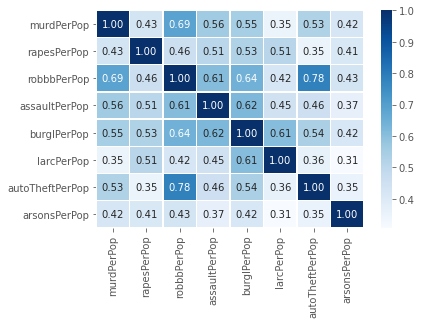

In [154]:
sns.heatmap(data = data.loc[:,y_col].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()